# Importing Libaraies

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 
%matplotlib inline
import seaborn as sns

# Reading data from CSV file

In [209]:
data=pd.read_csv('SUV/suv_data.csv')

In [210]:
data.shape   #400 rows and 5 coloumns

(400, 5)

In [211]:
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Plotting Data Graphically

<AxesSubplot:xlabel='Purchased', ylabel='count'>

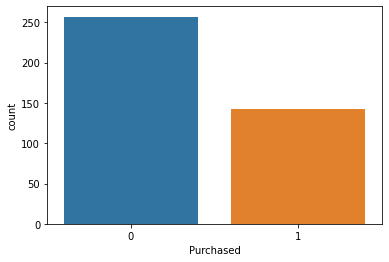

In [212]:
#How many people are buying the data
sns.countplot(x="Purchased",data=data)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

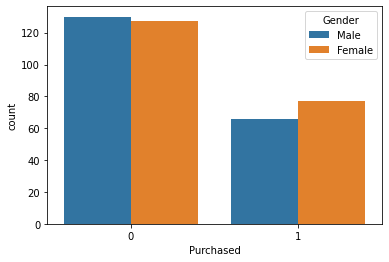

In [213]:
#Which gender ratio is more in buying
sns.countplot(x="Purchased",hue="Gender",data=data)

<AxesSubplot:ylabel='Frequency'>

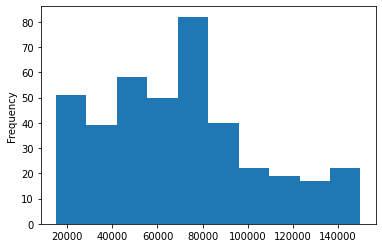

In [214]:
#amount of salary percentage for buying 
data["EstimatedSalary"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

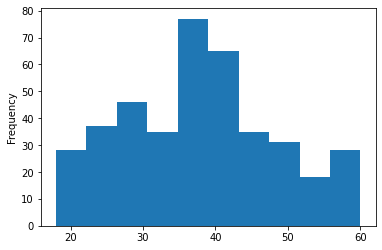

In [215]:
#what age people are more buying 
data["Age"].plot.hist()

# Checking for Null Values 

In [216]:
data.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [217]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# Replacing String data with Categorical value

In [218]:
sex=pd.get_dummies(data['Gender'],drop_first=True)
sex

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [228]:
data=pd.concat([data,sex],axis=1)
data

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,1


In [229]:
data.drop(['Gender'],axis=1,inplace=True)
data.head(5)

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [230]:
from sklearn.model_selection import train_test_split

In [231]:
y=data['Purchased']
X=data.drop(['Purchased'],axis=1)

In [232]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)

In [233]:
from sklearn.linear_model import LogisticRegression

In [234]:
Model=LogisticRegression()
Model

LogisticRegression()

In [235]:
Model.fit(X_train, y_train)

LogisticRegression()

In [236]:
predict=Model.predict(X_test)

# Classification Report

In [250]:
from sklearn.metrics import classification_report

In [251]:
classification_report(y_test,predict)

'              precision    recall  f1-score   support\n\n           0       0.77      0.97      0.86        79\n           1       0.90      0.44      0.59        41\n\n    accuracy                           0.79       120\n   macro avg       0.83      0.71      0.73       120\nweighted avg       0.81      0.79      0.77       120\n'

In [241]:
from sklearn.metrics import confusion_matrix

In [244]:
confusion_matrix(y_test,predict)

array([[77,  2],
       [23, 18]], dtype=int64)

In [248]:
from sklearn.metrics import accuracy_score

In [249]:
accuracy_score(y_test,predict)

0.7916666666666666

# This Model is accurate 79%


# Best,
AIMEN JAVED